# Generative Adversarial Networks (GANs)


## Reminder of Generative Models vs Discriminative Models 

Well they have been replaced, but they are still very useful.

Suppose we have two tasks on a dataset of tweets:

**Discriminative:** Discriminate between data samples. We want to categorize or classize. At the end of the day there's still some signal. 

**Generative**: Surprise! We're generating new stuff. 

1. Identify if a tweet is real or fake 
- Task is **supervised** and requires a **discriminative model**. 
- Model learns to approximate **p(y|x)**, this conditional probability of **classes given input data**. We are at the end of the day using Cross Entropy over softmax. 
 
2. Generate a new tweet 
- This task is **unsupervised**! This requires a generative model

(Almost always unsupervised. Remember VAE that you did not need the labeling.)

- The model learns to mimick/approximate **p(x)**. 

If you learn this distribution, you can easily sample from it and generate samples. Recall the VAE. 

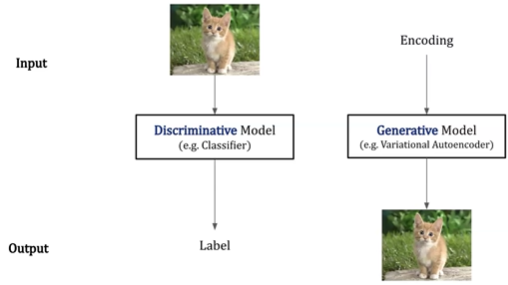

Of course the generative model can just spit out random noise. 

Even for humans, discriminative models are easier tasks than generative models. It's like just classifying a cat or drawing a cat. 

## Generative Learning 

This is an **Unsupervised Learning Task**

- There is a loss function --> auxiliary task that we know the answer to 
- There is **no ground truth** with respect to the actual task we want to accomplish. 
- We are learning the **structure & distributino of data** rather than labels for data. 



## Generative Model 

1. Unconditional Generative Models 
- Random noise or fixed token as input 
- NO CONTROL over what category they generate 

--> LIke VAEs, we pass random noise and give iamge, or autoregressive RNNs 

2. Conditional Generative Models 
- One-hot encoding of the target category + random noise

(One-hot encoding of the class/image I want to be generated). For example text descriptiion of what you want the image to be. 

- Embedding generated by another model from CNN 
- User have a high-level control over what the model will generate. 

## Different architecture
1. Autoregressive Models: These are just the RNNs we looked at in the past. 
2. VAEs: Encoder-decoder architecture
3. Generative Adversarial Networks (GANs)
4. Flow-based generative models (Out of scope)
5. Diffusion Models (Out of scope)

## Problem with Vanilla Autoencoders 

These generate blurry images with blurry backgrounds. 

To minimize the MSE Loss, autoencoders predict the average pixel. 

Now, can we use a **better loss function?**

The autoencoders compare the predicted and original image. 

If you collect lots of images of faces, some of them will be tilted, looking in different directions, etc. 

The model however, tries to minimize the loss across all different kinds of images. The model will then just learn an **average pixel**, or some kind of superposition of all orientations of the face. 

## The issue is clearly the Loss Function.

## Introduction to GANs 

The idea is to train **two models**. We know the issue of blurring is due to the loss function. We defined a loss function that comapres input image with output image pixelwise, which is pixelwise. 

Let's remove the hard-coded loss function. Let's just learn the loss function of the generative model. 

1. Generator model
- Similar to DECODER 
- Receives some noise and generates images. 
- Try to "fool" the discriminator by generatign real-looking images 

Now how should I know if the generated image is similar to the training data? 

For VAEs, this would just be fed and compared to the original. 

2. Discriminator Model: 
Is the image coming from a similar distribution as your training data? 

We define a classifier for this. This is the **discriminator**. 

- Try to distinguish between **real and fake images**
- Receives images from generator and ALSO from the training data. Then tells you if the image is real or fake. 

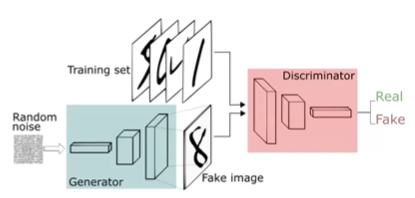

## Training GAN 

At the beginning, the generator just receives noise and outputs random images. 

Sample images from generator as well as the training data. We then send these to the discriminator. 

Based on the performance of Discriminator, we go back and train the Generator. Then you sample some other image from generator and training data, and train the discriminator again. 

You train your generator a bit, you freeze it, you train your discriminator, you freeze it. You want the generator to become so good, it can't discriminate the generator images and training data. 

We need at the end a strong generator that fools the discriminator. If your discrminator is weak however, the generator can just output random stuff. 

This is why we want to whole-evolve these two things and we repeatedly freeze different parts of the network. 

**Zero Sum Game/MinMax game**: We want the generator to WIN. They cannot both win. 

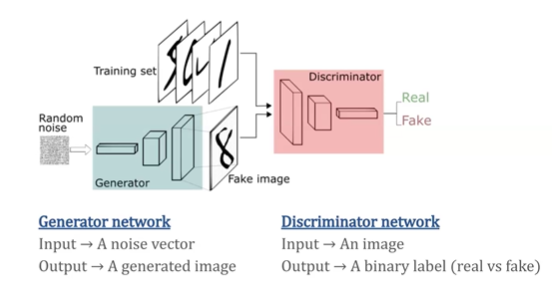

The generator is like a forger. It forges the training data to create counterfeits. 

The discriminator, like a police, to catch the generator as much as it could. We want the generator to maximize discriminator mistakes, and we want discriminators to minimize its own mistakes 

## Loss Function for MinMax Game 

Learn discriminator weights to maximize the probability that it labels a **real image as real** and a **generated image as fake**. 

We will use Binary Cross Entropy for this. 

Image -> Classifier -> Sigmoid -> BCE -> Gradient Descent 

The loss function of generator is the discriminator model. 

## Learning Generator 
We learn generator weigths to maximize the probability that the **discriminator labels a generated image as real**. We will use the discriminator as the loss function. 

## PyTorch Discriminator 

Now of course since this is for images you should do a CNN-based approach. 

In [1]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 300).
            nn.LeakyReLU(0.2),
            nn.Linear(300, 100),
            nn.LeakyReLU(0.2),
            nn.Linear(100, 1) # We want to produce a classification
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.model(x)
        return out.view(x.size(0))



NameError: name 'nn' is not defined

In [ ]:
def train_discriminator(discriminator, generator, images):
    batch_size = images.size(0)
    noise = torch.randn(batch_size, 100) # create as many noise vectors as batch size 
    fake_images = generator(noise)
    inputs = torch.cat([image, fake_image])
    labels = torch.cat([torch.zeros(batch_size), torch.ones(batch_size)])

    # [64, 64] first 64 are real and hence class 0. Last 64 are fake and hence Class 1 
    outputs = discriminator(inputs)
    loss = criterion(outputs, labels)
    return outputs, loss

# Note the generator is frozen 

In [3]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 300),
            nn.LeakyReLU(0.2),
            nn.Linear(300, 28*28),
            nn.Sigmoid
        )
    def forward(self, x):
        out = self.model(x).view(x.size(0), 1, 28, 28)
        return out.view(x.size(0))

NameError: name 'nn' is not defined

In [4]:
def train_generator(discriminator, generator, batch_size):
    batch_size = images.size(0)
    noise = torch.randn(batch_size, 100)
    fake_images = generator(noise)
    outputs = discriminator(fake_images)

    # Only looks at fake outputs. 
    # Gets rewarded if we fool the discriminator! 

    labels = torch.zeros(batch_size)
    loss = criterion(outputs, labels)
    return fake_images, loss

Note the generator doesn't care about real images. It cares whether or not discrminator succeeds to identifying generated images. So, the batch of real images don't even go into the generator. 

If the discriminator has a low loss, the Generator shoud have a high loss 

The Generator tries to **maximize** the loss of discriminator. Note that gradient descent DOES NOT WORK. 

## Gradient Ascent....
The generator should actually try to maximize the loss of the discriminator! 

Now we don't need to change the optimizer. 

Note that we say 

Class 0 -> Real 

Class 1 -> Fake 

We say the ground truth is ALL ZEROS. 

In training discriminator, we need to **reward fooling the discriminator!**

We label the fake images as 1. But now we flip the labels. We label the fake images as 0 (real) when we train the generator. 



[0.2, 0.9, 0.7] (Predictions)

[0, 0, 0] (Fake Ground Truths)


In the 0.9, the Discriminator is very confident that it's a fake image! 

## Training Loop 

Now this would just be 

for n in iterations 

train_disc()
train_generate()

## Problem of training GANs? 


This is definitely not as simple as training a VAE. 

1. Vanishing Gradients ---> If the discriminator is too good, then the generator will NOT LEARN! This is when one model becomes much stronger than another model early in the training. 

For example the discriminator becomes so good, whatever the generator does, it does not change its behavior. It will just label every generator-inputed image as fake. 

This means, if small changes in generator weigths make no different, then we can't incrementally improve the generator. 

2. Mode Collapse --> If generator starts producing 

One of the model gets stuck in a local optimum. IT cannot adapt to geneator and the generator can fool it by only generatiing one type of data. 

Let's say the Discriminator converged to a local optimal. It is successful in detecting everything except digit 1.

Then the generator would just continuously generator 1 to fool the discriminator! 

3. Difficulty for Convergence 

Difficult to numerically see whether there is progress. Plotting the "training curve" doesn't help much. 

At least, to combat this 
- LeakyReLU Activations 
- Batch Normalization 
- Regularizing discriminator weights and adding noise to discriminator inputs

## GAN Applications 

1. Grayscale to Color. 

Color to Grayscale is easy enough. This used to be done by artists to manually at colors to the images. 

The GAN can actually learn through the following architecture 

- Collect a bunch of images
- Convert images to grayscale (very cheap)
- Pass grayscale images into generator (conditional generator). You do NOT pass noise into the generator 

- Generator gives you colored version of the inpt. Now pass the original image as well as the colored image into the **discriminator** to output real/fake. 

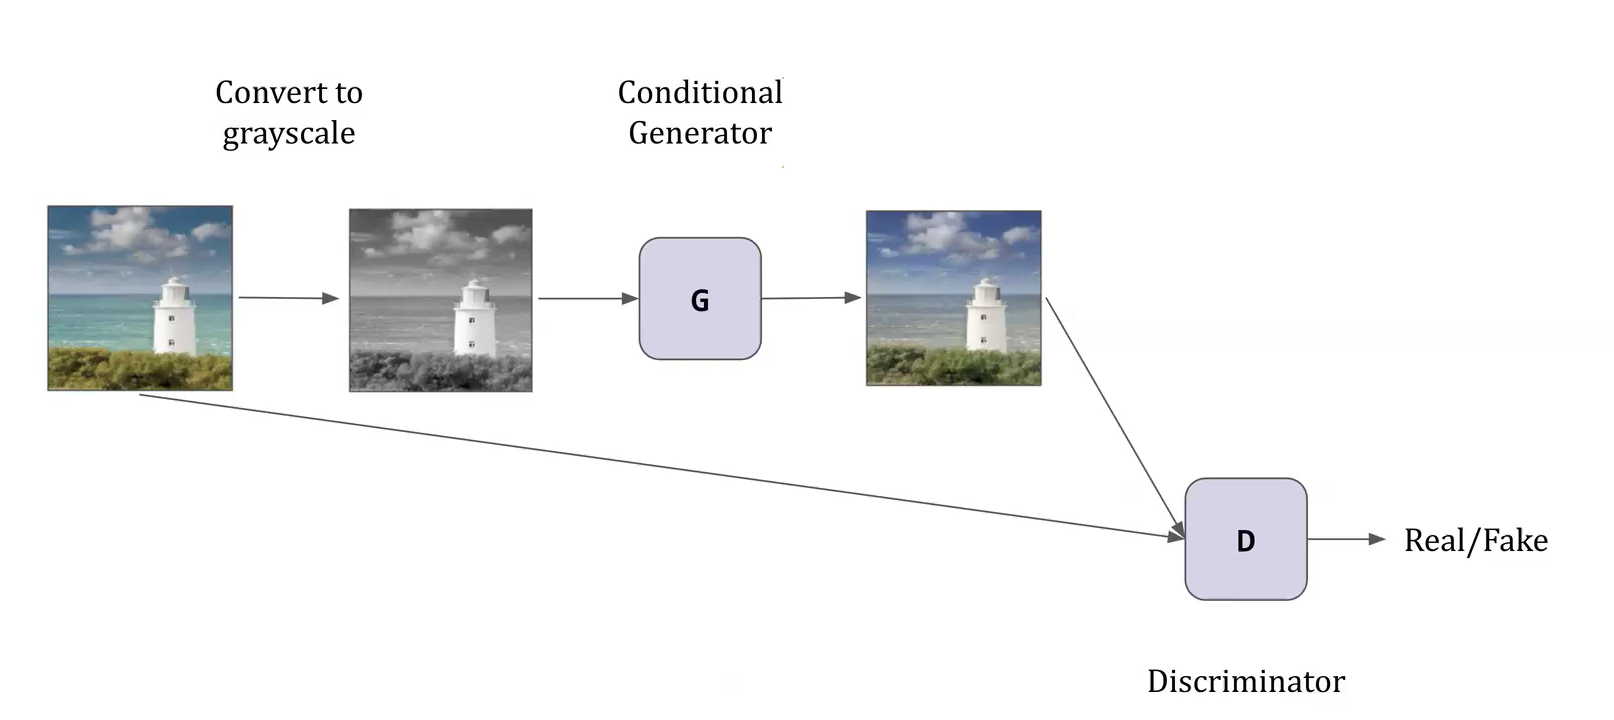

- The generator will add colors to the grayscale image such that the discriminator can't tell if it's generateed or real data. 

Now we can just throw out the discriminator, and just use the generator. 

## Conditional Generation 
How  could we have a GAN trained on MNIST output only specific digits 

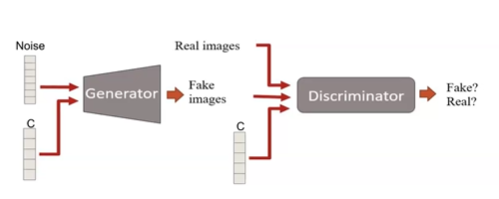

Only thing you need to do, keep all the inputs to the generator and discriminator. Also, send the 1-hot encoding to the generator AND discriminator. 

You need to make sure the generator is learning to generate from specific tasks. 



## Style Transfer 

**Cycle GAN:** Cycle loss is reconstruction loss between input to cyclegan and output of cyclegan.

In a style transfer, you change the style of input image. Let's say you have an image of zebras. You want to keep the same object, postures, but you want to replace the zebras with horses. 

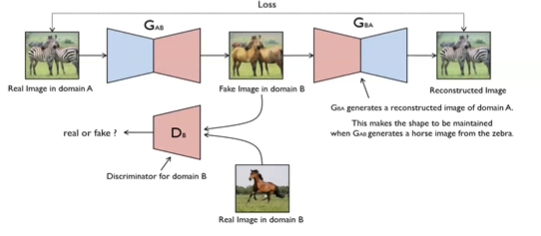

Let's say we take images of zebras and maps them to images of horses. 

The **first** part is a standard GAN. So G_AB maps images to horses. 

Now for Discriminator takes in real images of horses and fake images of horses, and tells you if it's real or fake. 

There is nothing that can keep the geometry however. 

The **second** part is a second Generator. It takes the output of the first generator and tries to reconstruct back the images in the output. 

The only way that is possible is if the middle image is super similar to the original zebra image. 

Now we have a construction loss for both generators! 
